# fashion_MNIST

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()

In [2]:
import matplotlib.pyplot as plt
import random

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Truoser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

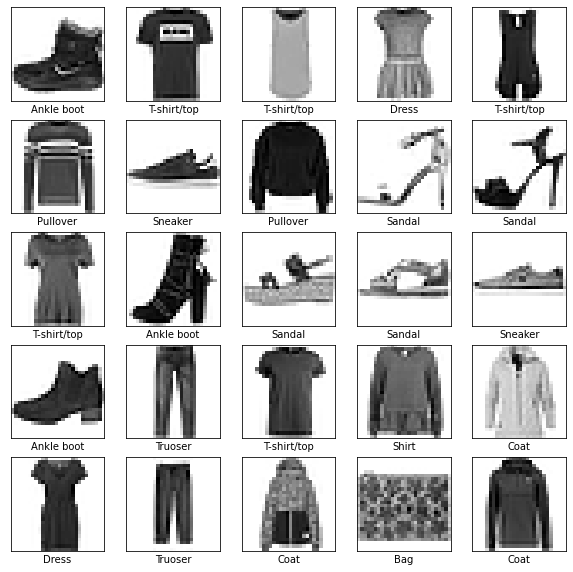

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
print(x_train.shape)
print(len(y_train))
print(y_train)

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]


In [7]:
print(x_test.shape)
print(len(y_test))

(10000, 28, 28)
10000


In [8]:
x_train, x_test = x_train/255.0, x_test/255.0
x_train = x_train.reshape([-1, 784])
x_test = x_test.reshape([-1, 784])

nb_classes = 10

y_train = tf.one_hot(y_train, nb_classes)
y_train = tf.Session().run(y_train)

y_test = tf.one_hot(y_test, nb_classes)
y_test = tf.Session().run(y_test)

In [11]:
X = tf.placeholder(tf.float32, [None, 784]) #28*28 = 784
Y = tf.placeholder(tf.float32, [None, nb_classes])

W=tf.Variable(tf.random_normal([784, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

hypothesis = tf.nn.softmax(tf.matmul(X, W)+b)

In [12]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

#Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y,1))

#calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Epoch: 0001, Cost: 2.693878569
Epoch: 0002, Cost: 1.423036533
Epoch: 0003, Cost: 1.197275132
Epoch: 0004, Cost: 1.072744227
Epoch: 0005, Cost: 0.988885517
Epoch: 0006, Cost: 0.926768845
Epoch: 0007, Cost: 0.878061399
Epoch: 0008, Cost: 0.838436062
Epoch: 0009, Cost: 0.805359794
Epoch: 0010, Cost: 0.777223745
Epoch: 0011, Cost: 0.752924918
Epoch: 0012, Cost: 0.731665624
Epoch: 0013, Cost: 0.712855592
Epoch: 0014, Cost: 0.696053130
Epoch: 0015, Cost: 0.680922093
Learning finished
Accuracy:  0.7962
Label:  T-shirt/top
Prediction:  T-shirt/top


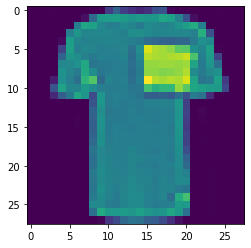

In [20]:
num_epochs = 15
batch_size = 100
num_iterations = int(len(x_train) / batch_size)

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(num_epochs):
        avg_cost = 0
        k = 0
        for i in range(num_iterations):
            batch_xs = x_train[k: k+batch_size]
            batch_ys = y_train[k: k+batch_size]
            k = k+batch_size
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            
            avg_cost += cost_val / num_iterations
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch+1, avg_cost))
        
    print('Learning finished')
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: x_test, Y: y_test}))
    
    r = random.randint(0, len(x_test) - 1)
    lbl1 = sess.run(tf.argmax(y_test[r: r+1], 1))
    lbl2 = sess.run(tf.argmax(hypothesis, 1), feed_dict = {X: x_test[r: r+1]})

    print("Label: ", class_names[lbl1[0]])
    print("Prediction: ", class_names[lbl2[0]])

    plt.imshow(x_test[r: r+1].reshape(28, 28), interpolation="nearest",)
    plt.show()